# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display
from scipy import stats
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

# Extract Data

In [ ]:
df = pd.read_csv('aviation_traffic_dataset_c70_v2.csv')

In [ ]:
df.head()

,airline_iata,acft_icao,acft_class,seymour_proxy,seats,n_flights,iata_departure,iata_arrival,seats_no_est_scaling,distance_km,rpk,fuel_burn_seymour,fuel_burn,co2
0,DL,A319,NB,A319,7126.500000,54.0,SLC,SEA,7126.500000,1108.278630,6.508074e+06,3848.835887,2.078371e+05,6.567654e+05
1,SY,B737,NB,B737,64.500000,0.5,MCI,SGF,64.500000,255.581595,1.358365e+04,1896.988052,9.484940e+02,2.997241e+03
2,KL,B738,NB,B738,526.072739,3.0,AMS,BER,526.072739,595.197913,2.580087e+05,2983.449374,8.950348e+03,2.828310e+04
3,QS,B737,NB,B737,828.355102,6.0,PAS,JMK,828.355102,50.515802,3.448030e+04,1380.853524,8.285121e+03,2.618098e+04
4,QR,A359,WB,A359,97292.676210,315.0,OSL,DOH,97292.676210,4959.707484,3.976156e+08,34389.325720,1.083264e+07,3.423113e+07


# Data Analysis

In [ ]:
categorical_columns = []
numerical_columns = []

for column, dtype in df.dtypes.items():
    if dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: ['airline_iata', 'acft_icao', 'acft_class', 'seymour_proxy', 'iata_departure', 'iata_arrival']
Numerical columns: ['seats', 'n_flights', 'seats_no_est_scaling', 'distance_km', 'rpk', 'fuel_burn_seymour', 'fuel_burn', 'co2']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171782 entries, 0 to 171781
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   airline_iata          171782 non-null  object 
 1   acft_icao             171782 non-null  object 
 2   acft_class            171782 non-null  object 
 3   seymour_proxy         171782 non-null  object 
 4   seats                 171782 non-null  float64
 5   n_flights             171782 non-null  float64
 6   iata_departure        171782 non-null  object 
 7   iata_arrival          171782 non-null  object 
 8   seats_no_est_scaling  171782 non-null  float64
 9   distance_km           171782 non-null  float64
 10  rpk                   171782 non-null  float64
 11  fuel_burn_seymour     171782 non-null  float64
 12  fuel_burn             171782 non-null  float64
 13  co2                   171782 non-null  float64
dtypes: float64(8), object(6)
memory usage: 18.3+ MB


In [ ]:
df.describe()

,seats,n_flights,seats_no_est_scaling,distance_km,rpk,fuel_burn_seymour,fuel_burn,co2
count,1.717820e+05,171782.000000,1.717820e+05,171782.000000,1.717820e+05,171782.000000,1.717820e+05,1.717820e+05
mean,1.157876e+04,80.762775,1.157876e+04,1793.654071,2.114465e+07,8251.080190,6.395500e+05,2.020978e+06
std,3.298078e+04,225.962767,3.298078e+04,1927.641420,9.125712e+07,14253.782676,2.913438e+06,9.206463e+06
min,0.000000e+00,0.500000,0.000000e+00,2.694653,0.000000e+00,-1682.727352,-1.682727e+03,-5.317418e+03
25%,9.950000e+01,1.000000,9.950000e+01,584.551839,7.460856e+04,2156.853345,3.501500e+03,1.106474e+04
50%,5.864048e+02,4.500000,5.864048e+02,1247.826740,7.345612e+05,4342.133120,2.440302e+04,7.711355e+04
75%,7.477932e+03,51.000000,7.477932e+03,2201.820864,8.870456e+06,7910.096210,2.729803e+05,8.626177e+05
max,1.246720e+06,11466.500000,1.246720e+06,17016.029310,3.544169e+09,286618.662600,1.282607e+08,4.053040e+08


In [ ]:
df['co2'].describe()

count    1.717820e+05
mean     2.020978e+06
std      9.206463e+06
min     -5.317418e+03
25%      1.106474e+04
50%      7.711355e+04
75%      8.626177e+05
max      4.053040e+08
Name: co2, dtype: float64

In [ ]:
correlation_matrix = df[numerical_columns].corr()
correlation_matrix

,seats,n_flights,seats_no_est_scaling,distance_km,rpk,fuel_burn_seymour,fuel_burn,co2
seats,1.000000,0.882351,1.000000,0.076960,0.618374,0.119646,0.608104,0.608104
n_flights,0.882351,1.000000,0.882351,-0.036170,0.385249,-0.008330,0.388380,0.388380
seats_no_est_scaling,1.000000,0.882351,1.000000,0.076960,0.618374,0.119646,0.608104,0.608104
distance_km,0.076960,-0.036170,0.076960,1.000000,0.376012,0.868598,0.359485,0.359485
rpk,0.618374,0.385249,0.618374,0.376012,1.000000,0.450183,0.985648,0.985648
fuel_burn_seymour,0.119646,-0.008330,0.119646,0.868598,0.450183,1.000000,0.454761,0.454761
fuel_burn,0.608104,0.388380,0.608104,0.359485,0.985648,0.454761,1.000000,1.000000
co2,0.608104,0.388380,0.608104,0.359485,0.985648,0.454761,1.000000,1.000000


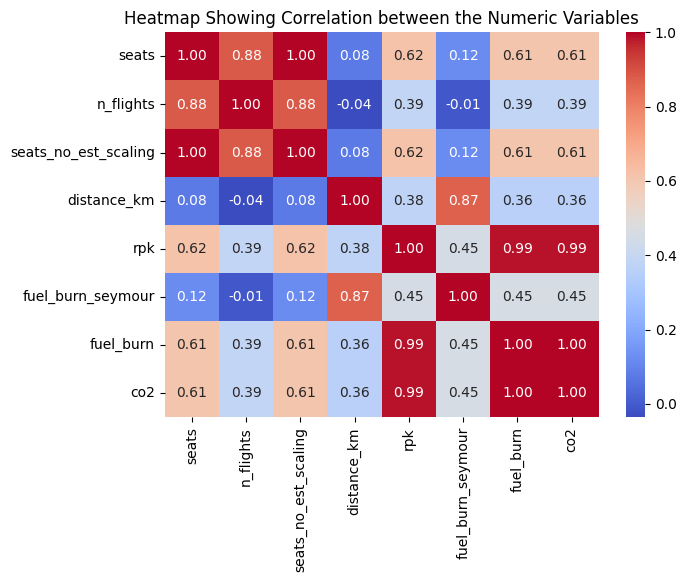

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Showing Correlation between the Numeric Variables')
plt.show()

In [ ]:
# Dropping 'seats_no_est_scaling' as it basically duplicates information already captured by 'seats'.
#df = df.drop(columns=['seats_no_est_scaling', 'acft_class', 'seymour_proxy'])
df = df.drop(columns=['seats_no_est_scaling', 'acft_class', 'seymour_proxy', 'iata_departure', 'iata_arrival'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171782 entries, 0 to 171781
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   airline_iata       171782 non-null  object 
 1   acft_icao          171782 non-null  object 
 2   seats              171782 non-null  float64
 3   n_flights          171782 non-null  float64
 4   distance_km        171782 non-null  float64
 5   rpk                171782 non-null  float64
 6   fuel_burn_seymour  171782 non-null  float64
 7   fuel_burn          171782 non-null  float64
 8   co2                171782 non-null  float64
dtypes: float64(7), object(2)
memory usage: 11.8+ MB


In [ ]:
categorical_columns = []
numerical_columns = []

for column, dtype in df.dtypes.items():
    if dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: ['airline_iata', 'acft_icao']
Numerical columns: ['seats', 'n_flights', 'distance_km', 'rpk', 'fuel_burn_seymour', 'fuel_burn', 'co2']


# Data Preprocessing & Feature Engineering

## Extract Null Values

In [ ]:
df.isnull().values.any()

False

## Encode catgeorical variables

In [ ]:
for column in categorical_columns:
    print(column, df[column].nunique())

airline_iata 729
acft_icao 126


In [ ]:
label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,airline_iata,acft_icao,seats,n_flights,distance_km,rpk,fuel_burn_seymour,fuel_burn,co2
0,236,5,7126.500000,54.0,1108.278630,6.508074e+06,3848.835887,2.078371e+05,6.567654e+05
1,612,34,64.500000,0.5,255.581595,1.358365e+04,1896.988052,9.484940e+02,2.997241e+03
2,398,35,526.072739,3.0,595.197913,2.580087e+05,2983.449374,8.950348e+03,2.828310e+04
3,545,34,828.355102,6.0,50.515802,3.448030e+04,1380.853524,8.285121e+03,2.618098e+04
4,544,15,97292.676210,315.0,4959.707484,3.976156e+08,34389.325720,1.083264e+07,3.423113e+07


## Removing Outliers

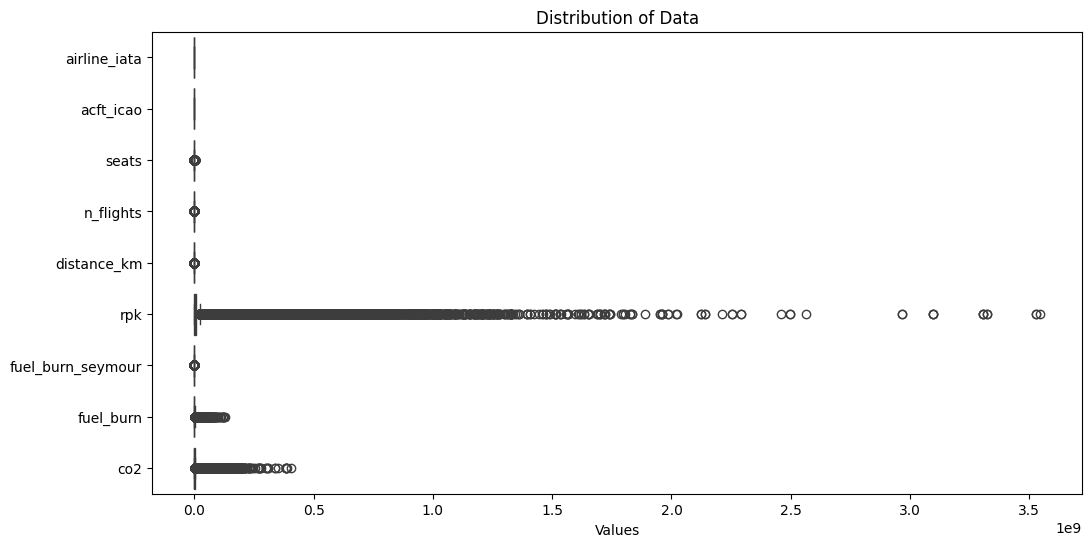

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient='h')  # Horizontal box plot

# Set plot title and labels
plt.title('Distribution of Data')
plt.xlabel('Values')

# Show the plot
plt.show()

In [ ]:
# Define a function to remove outliers based on z-score
def remove_outliers(df, threshold=3):
    z_scores = np.abs(stats.zscore(df))
    df_no_outliers = df[(z_scores < threshold).all(axis=1)]
    return df_no_outliers

# Apply the function to your DataFrame
df_no_outliers = remove_outliers(df)

# Check the shape before and after removing outliers
print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_no_outliers.shape)

Shape before removing outliers: (171782, 9)
Shape after removing outliers: (160659, 9)


In [ ]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160659 entries, 0 to 171781
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   airline_iata       160659 non-null  int64  
 1   acft_icao          160659 non-null  int64  
 2   seats              160659 non-null  float64
 3   n_flights          160659 non-null  float64
 4   distance_km        160659 non-null  float64
 5   rpk                160659 non-null  float64
 6   fuel_burn_seymour  160659 non-null  float64
 7   fuel_burn          160659 non-null  float64
 8   co2                160659 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 12.3 MB


In [ ]:
df = df_no_outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160659 entries, 0 to 171781
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   airline_iata       160659 non-null  int64  
 1   acft_icao          160659 non-null  int64  
 2   seats              160659 non-null  float64
 3   n_flights          160659 non-null  float64
 4   distance_km        160659 non-null  float64
 5   rpk                160659 non-null  float64
 6   fuel_burn_seymour  160659 non-null  float64
 7   fuel_burn          160659 non-null  float64
 8   co2                160659 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 12.3 MB


## Train/Test Split

In [ ]:
#Y = df['co2'].values
Y = df['co2'].values
df = df.drop(columns=['co2'])
X = df.values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160659 entries, 0 to 171781
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   airline_iata       160659 non-null  int64  
 1   acft_icao          160659 non-null  int64  
 2   seats              160659 non-null  float64
 3   n_flights          160659 non-null  float64
 4   distance_km        160659 non-null  float64
 5   rpk                160659 non-null  float64
 6   fuel_burn_seymour  160659 non-null  float64
 7   fuel_burn          160659 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 11.0 MB


In [ ]:
X

array([[2.36000000e+02, 5.00000000e+00, 7.12650000e+03, ...,
        6.50807367e+06, 3.84883589e+03, 2.07837138e+05],
       [6.12000000e+02, 3.40000000e+01, 6.45000000e+01, ...,
        1.35836506e+04, 1.89698805e+03, 9.48494026e+02],
       [3.98000000e+02, 3.50000000e+01, 5.26072739e+02, ...,
        2.58008735e+05, 2.98344937e+03, 8.95034812e+03],
       ...,
       [2.43000000e+02, 2.20000000e+01, 1.05206369e+03, ...,
        2.55521510e+05, 5.58792520e+02, 8.38188781e+03],
       [6.53000000e+02, 3.50000000e+01, 2.63036370e+02, ...,
        3.19436544e+05, 5.68390202e+03, 8.52585303e+03],
       [1.38000000e+02, 3.10000000e+01, 6.74586207e+02, ...,
        7.58265672e+05, 5.74074912e+03, 2.58333710e+04]])

In [ ]:
Y

array([656765.3558  ,   2997.241122,  28283.10007 , ...,  26486.76547 ,
        26941.69557 ,  81633.45247 ])

### Select k best

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X and y are already defined and X is a DataFrame
# Initialize SelectKBest with f_classif scoring function
selector = SelectKBest(score_func=f_classif, k='all')

# Fit the selector to the data
selector.fit(X, Y)

# Transform the data to select the top k features
X_new = selector.transform(X)

# Boolean mask that indicates which features are selected
mask = selector.get_support()

# Scores of each feature
scores = selector.scores_

# Get the names and scores of the selected features
selected_features_scores = [(feature, score) for feature, score, selected in zip(df.columns, scores, mask) if selected]

# Sort features based on their scores, highest first
selected_features_scores.sort(key=lambda x: x[1], reverse=True)

print("Selected features in order of importance:")
for feature, score in selected_features_scores:
    print(f"{feature}: {score}")


Selected features in order of importance:
n_flights: inf
fuel_burn_seymour: inf
fuel_burn: inf
seats: 83307087.75594284
rpk: 64109640.38640603
distance_km: 546470.1935974336
acft_icao: 1930.4912170856671
airline_iata: 27.110136562593212


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Initialize SelectKBest with f_classif scoring function
selector = SelectKBest(score_func=f_classif, k=5)

# Fit and transform the data to select the top 10 features
X_new = selector.fit_transform(X, Y)
X_new

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


array([[7.12650000e+03, 5.40000000e+01, 6.50807367e+06, 3.84883589e+03,
        2.07837138e+05],
       [6.45000000e+01, 5.00000000e-01, 1.35836506e+04, 1.89698805e+03,
        9.48494026e+02],
       [5.26072739e+02, 3.00000000e+00, 2.58008735e+05, 2.98344937e+03,
        8.95034812e+03],
       ...,
       [1.05206369e+03, 1.50000000e+01, 2.55521510e+05, 5.58792520e+02,
        8.38188781e+03],
       [2.63036370e+02, 1.50000000e+00, 3.19436544e+05, 5.68390202e+03,
        8.52585303e+03],
       [6.74586207e+02, 4.50000000e+00, 7.58265672e+05, 5.74074912e+03,
        2.58333710e+04]])

In [ ]:
mask = selector.get_support()
# Get the names of the selected features
selected_features = [feature for feature, selected in zip(df.columns, mask) if selected]
print("Selected features:", selected_features)

Selected features: ['seats', 'n_flights', 'rpk', 'fuel_burn_seymour', 'fuel_burn']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
X_train.shape, X_test.shape

((128527, 8), (32132, 8))

## Normalize

In [ ]:
m=len(X_train)
n = len(df.columns)

X_train = X_train.reshape((m, n))
scaler = StandardScaler()
scaler.fit(X_train) # Fit the scaler to the training data

X_train = scaler.transform(X_train)  # Create the scaled TRAIN input data
X_train = X_train.reshape((m, n))

In [ ]:
print(X_train[:5])

[[-1.08031914e+00 -1.22436572e+00 -8.28220557e-02 -2.13606886e-01
  -5.83016853e-01 -2.38247848e-01 -4.04402539e-01 -2.68056421e-01]
 [ 1.38280560e+00 -5.79966738e-02 -3.79262926e-01 -4.33997934e-01
  -7.81551787e-01 -3.58739366e-01  5.49921237e-01 -3.45875460e-01]
 [-7.74069176e-01 -1.00370131e+00 -3.08907477e-01 -3.84522393e-01
   1.73790412e+00 -9.22245705e-02  2.72450970e+00 -8.18916920e-02]
 [ 3.76555704e-01 -1.52567137e-01 -1.03497152e-01 -1.82122451e-01
   7.27896444e-01  5.77062610e-02  4.21502042e-01 -1.52433149e-03]
 [ 3.98430701e-01  8.24660984e-01 -4.57425714e-01 -4.51989040e-01
  -5.95275380e-01 -3.77100967e-01 -6.54458276e-01 -3.90674374e-01]]


In [ ]:
m=len(X_test)
X_test = X_test.reshape((m, n))

X_test = scaler.transform(X_test) # Create the scaled TEST input data
X_test = X_test.reshape((m, n))

# Model Training

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model

In [ ]:
# Define a function to train the model, evaluate its performance, and get weights and bias
def evaluate_model(model, X_train, Y_train, X_test, Y_test):
    # Train the model
    model.fit(X_train, Y_train)

    # Evaluate the model on training data
    train_r2_score = model.score(X_train, Y_train)
    train_mse_score = mean_squared_error(Y_train, model.predict(X_train))
    train_mae_score = mean_absolute_error(Y_train, model.predict(X_train))

    # Evaluate the model on test data
    test_r2_score = model.score(X_test, Y_test)
    test_mse_score = mean_squared_error(Y_test, model.predict(X_test))
    test_mae_score = mean_absolute_error(Y_test, model.predict(X_test))

    # Get weights (coefficients) and bias (intercept)
    weights = model.coef_
    bias = model.intercept_

    return train_r2_score, train_mse_score, train_mae_score, test_r2_score, test_mse_score, test_mae_score, weights, bias



In [ ]:
# Define models and assign each model to a variable
linear_reg_model = linear_model.LinearRegression()
lasso_reg_model = linear_model.Lasso(alpha=1.0)
ridge_reg_model = linear_model.Ridge(alpha=1.0)
elastic_net_model = linear_model.ElasticNet(alpha=1.0)

# Define a dictionary with model names as keys and models as values
models = {
    'Linear Regression': linear_reg_model,
    'Lasso Regression': lasso_reg_model,
    'Ridge Regression': ridge_reg_model,
    'Elastic Net Regression': elastic_net_model,
}



In [ ]:
# Iterate over each model and evaluate its performance
for name, model in models.items():
    print(f"\nModel: {name}")
    train_r2_score, train_mse_score, train_mae_score, test_r2_score, test_mse_score, test_mae_score, weights, bias = evaluate_model(model, X_train, Y_train, X_test, Y_test)
    print("Training Performance:")
    print(f"R-squared score: {train_r2_score}")
    print(f"MSE: {train_mse_score}")
    print(f"MAE: {train_mae_score}")
    print("Test Performance:")
    print(f"R-squared score: {test_r2_score}")
    print(f"MSE: {test_mse_score}")
    print(f"MAE: {test_mae_score}")
    print("Weights (Coefficients):", weights)
    print("Bias (Intercept):", bias)



Model: Linear Regression
Training Performance:
R-squared score: 1.0
MSE: 1.9540410023588143e-07
MAE: 0.00013493082264261281
Test Performance:
R-squared score: 1.0
MSE: 1.9468067649638345e-07
MAE: 0.00013355035491605804
Weights (Coefficients): [ 5.27189179e-07  5.30388206e-07  4.73896512e-06  4.38063918e-06
 -1.82339545e-07  7.19830112e-06  1.62960910e-06  2.26207361e+06]
Bias (Intercept): 890791.523758229

Model: Lasso Regression
Training Performance:
R-squared score: 0.9999995286971688
MSE: 2411645.7646726933
MAE: 673.4177923625709
Test Performance:
R-squared score: 0.9999995222392165
MSE: 2345472.9954435676
MAE: 665.0909319573826
Weights (Coefficients): [-1.16311549e+01  1.84737904e+02 -1.16360156e+03  1.65921448e+03
 -9.30811005e+02  1.07241231e+04  9.87666736e+02  2.25131101e+06]
Bias (Intercept): 890791.523758229

Model: Ridge Regression
Training Performance:
R-squared score: 0.9999999968004039
MSE: 16372.26009848824
MAE: 50.03370113423449
Test Performance:
R-squared score: 0.999

**Linear Regression** consistently exhibits the lowest MSE and MAE across both training and test data, indicating that it produces predictions that are closest to the actual values on average.

In [ ]:
Y_train_pred = linear_reg_model.predict(X_train)
Y_test_pred = linear_reg_model.predict(X_test)

train_df = pd.DataFrame({'Actual Values': Y_train, 'Predicted Values': Y_train_pred})

# Combine actual and predicted values into a DataFrame for the test data
test_df = pd.DataFrame({'Actual Values': Y_test, 'Predicted Values': Y_test_pred})

# Display the DataFrames
print("Training Data:")
display(train_df.head(30))
print("\nTest Data:")
display(test_df.head(30))



Training Data:


,Actual Values,Predicted Values
0,2.844282e+05,2.844282e+05
1,1.083958e+05,1.083958e+05
2,7.055465e+05,7.055465e+05
3,8.873434e+05,8.873434e+05
4,7.057330e+03,7.057330e+03
5,6.805083e+05,6.805083e+05
6,8.668551e+03,8.668551e+03
7,3.449119e+06,3.449119e+06
8,3.395320e+04,3.395320e+04
9,7.551345e+05,7.551345e+05



Test Data:


,Actual Values,Predicted Values
0,4.421662e+06,4.421662e+06
1,6.468350e+06,6.468350e+06
2,4.976412e+06,4.976412e+06
3,3.698155e+03,3.698155e+03
4,1.040547e+04,1.040547e+04
5,1.180508e+03,1.180508e+03
6,2.002144e+05,2.002144e+05
7,6.355255e+04,6.355255e+04
8,8.946346e+03,8.946346e+03
9,3.781275e+04,3.781275e+04


# Predict on More Test Data

In [ ]:
test_df = pd.read_csv('aviation_traffic_dataset_c30.csv')

In [ ]:
test_df.head()

,airline_iata,acft_icao,acft_class,seymour_proxy,seats,n_flights,iata_departure,iata_arrival,distance_km,rpk,fuel_burn_seymour,fuel_burn,co2
0,MSC,B738,NB,B738,1052.145478,6.0,HRG,KTW,2872.645647,2.490491e+06,10218.392331,6.131035e+04,1.937407e+05
1,ZZZ,A318,NB,A318,173.119565,1.5,JED,JMK,2194.664043,3.130700e+05,6608.876700,9.913315e+03,3.132608e+04
2,GV,C208,TP,C208,4.500000,0.5,ANC,BET,641.822838,2.379879e+03,283.458031,1.417290e+02,4.478637e+02
3,TK,A333,WB,A333,131628.768345,438.0,DUS,ISL,2041.731325,2.214505e+08,15507.135657,6.792125e+06,2.146312e+07
4,MS,A320,NB,A320,7971.000000,48.0,CAI,BEY,564.491002,3.707636e+06,2721.741854,1.306436e+05,4.128338e+05


In [ ]:
test_df = test_df.drop(columns=['acft_class', 'seymour_proxy', 'iata_departure', 'iata_arrival'])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73620 entries, 0 to 73619
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   airline_iata       73620 non-null  object 
 1   acft_icao          73620 non-null  object 
 2   seats              73620 non-null  float64
 3   n_flights          73620 non-null  float64
 4   distance_km        73620 non-null  float64
 5   rpk                73620 non-null  float64
 6   fuel_burn_seymour  73620 non-null  float64
 7   fuel_burn          73620 non-null  float64
 8   co2                73620 non-null  float64
dtypes: float64(7), object(2)
memory usage: 5.1+ MB


## Handle Missing Values

In [ ]:
test_df.isna().sum()

airline_iata         0
acft_icao            0
seats                0
n_flights            0
distance_km          0
rpk                  0
fuel_burn_seymour    0
fuel_burn            0
co2                  0
dtype: int64

## Encode Categorical Columns

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73620 entries, 0 to 73619
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   airline_iata       73620 non-null  object 
 1   acft_icao          73620 non-null  object 
 2   seats              73620 non-null  float64
 3   n_flights          73620 non-null  float64
 4   distance_km        73620 non-null  float64
 5   rpk                73620 non-null  float64
 6   fuel_burn_seymour  73620 non-null  float64
 7   fuel_burn          73620 non-null  float64
 8   co2                73620 non-null  float64
dtypes: float64(7), object(2)
memory usage: 5.1+ MB


In [ ]:
categorical_columns

['airline_iata', 'acft_icao']

In [ ]:
label_encoder = LabelEncoder()

for column in categorical_columns:
    test_df[column] = label_encoder.fit_transform(test_df[column])

test_df.head()

,airline_iata,acft_icao,seats,n_flights,distance_km,rpk,fuel_burn_seymour,fuel_burn,co2
0,424,34,1052.145478,6.0,2872.645647,2.490491e+06,10218.392331,6.131035e+04,1.937407e+05
1,679,4,173.119565,1.5,2194.664043,3.130700e+05,6608.876700,9.913315e+03,3.132608e+04
2,302,59,4.500000,0.5,641.822838,2.379879e+03,283.458031,1.417290e+02,4.478637e+02
3,579,9,131628.768345,438.0,2041.731325,2.214505e+08,15507.135657,6.792125e+06,2.146312e+07
4,423,6,7971.000000,48.0,564.491002,3.707636e+06,2721.741854,1.306436e+05,4.128338e+05


In [ ]:
y_actual_test = test_df['co2'].values

In [ ]:
y_actual_test

array([1.93740719e+05, 3.13260756e+04, 4.47863690e+02, ...,
       7.49819498e+05, 3.33567347e+03, 3.39806684e+05])

In [ ]:
test_df = test_df.drop(columns=['co2'])

In [ ]:
test_df

,airline_iata,acft_icao,seats,n_flights,distance_km,rpk,fuel_burn_seymour,fuel_burn
0,424,34,1052.145478,6.0,2872.645647,2.490491e+06,10218.392331,6.131035e+04
1,679,4,173.119565,1.5,2194.664043,3.130700e+05,6608.876700,9.913315e+03
2,302,59,4.500000,0.5,641.822838,2.379879e+03,283.458031,1.417290e+02
3,579,9,131628.768345,438.0,2041.731325,2.214505e+08,15507.135657,6.792125e+06
4,423,6,7971.000000,48.0,564.491002,3.707636e+06,2721.741854,1.306436e+05
...,...,...,...,...,...,...,...,...
73615,236,5,1634.881547,12.0,135.731756,1.828500e+05,1508.851685,1.810622e+04
73616,463,66,31967.500000,487.5,1372.932498,3.616472e+07,3376.475298,1.646032e+06
73617,366,46,1040.041237,3.0,8940.747776,7.662167e+06,79094.883747,2.372847e+05
73618,463,66,32.500000,0.5,743.102226,1.990028e+04,2111.185741,1.055593e+03


In [ ]:
Test_X = test_df.values

In [ ]:
Test_X

array([[4.24000000e+02, 3.40000000e+01, 1.05214548e+03, ...,
        2.49049149e+06, 1.02183923e+04, 6.13103540e+04],
       [6.79000000e+02, 4.00000000e+00, 1.73119565e+02, ...,
        3.13069971e+05, 6.60887670e+03, 9.91331505e+03],
       [3.02000000e+02, 5.90000000e+01, 4.50000000e+00, ...,
        2.37987908e+03, 2.83458031e+02, 1.41729016e+02],
       ...,
       [3.66000000e+02, 4.60000000e+01, 1.04004124e+03, ...,
        7.66216702e+06, 7.90948837e+04, 2.37284651e+05],
       [4.63000000e+02, 6.60000000e+01, 3.25000000e+01, ...,
        1.99002776e+04, 2.11118574e+03, 1.05559287e+03],
       [5.00000000e+02, 3.40000000e+01, 4.20858191e+03, ...,
        3.76911326e+06, 4.48057337e+03, 1.07533761e+05]])

In [ ]:
Test_X.shape

(73620, 8)

In [ ]:
Test_X = scaler.transform(Test_X)
y_pred_test = linear_reg_model.predict(Test_X)

In [ ]:
y_pred_test

array([1.93740719e+05, 3.13260756e+04, 4.47863689e+02, ...,
       7.49819498e+05, 3.33567347e+03, 3.39806684e+05])

## Results

In [ ]:
df_results = pd.DataFrame({'Y Actual':y_actual_test, 'Y Predicted': y_pred_test})

In [ ]:
# Calculate absolute difference
absolute_difference = np.abs(y_actual_test - y_pred_test)

# Calculate squared difference
squared_difference = (y_actual_test - y_pred_test) ** 2

# Add the columns to df_results
df_results['Absolute Difference'] = absolute_difference
df_results['Squared Difference'] = squared_difference

# Display the updated DataFrame
print(df_results.head())


       Y Actual   Y Predicted  Absolute Difference  Squared Difference
0  1.937407e+05  1.937407e+05         5.570182e-07        3.102693e-13
1  3.132608e+04  3.132608e+04         4.443827e-07        1.974760e-13
2  4.478637e+02  4.478637e+02         6.551735e-07        4.292523e-13
3  2.146312e+07  2.146312e+07         9.124726e-05        8.326063e-09
4  4.128338e+05  4.128338e+05         5.836482e-07        3.406452e-13


In [ ]:
df_results

,Y Actual,Y Predicted,Absolute Difference,Squared Difference
0,1.937407e+05,1.937407e+05,5.570182e-07,3.102693e-13
1,3.132608e+04,3.132608e+04,4.443827e-07,1.974760e-13
2,4.478637e+02,4.478637e+02,6.551735e-07,4.292523e-13
3,2.146312e+07,2.146312e+07,9.124726e-05,8.326063e-09
4,4.128338e+05,4.128338e+05,5.836482e-07,3.406452e-13
...,...,...,...,...
73615,5.721566e+04,5.721566e+04,4.081616e-06,1.665959e-11
73616,5.201460e+06,5.201460e+06,1.210719e-05,1.465841e-10
73617,7.498195e+05,7.498195e+05,1.184037e-05,1.401944e-10
73618,3.335673e+03,3.335673e+03,2.356619e-07,5.553653e-14


In [ ]:
df_results.to_csv('co2PredictionsNew.csv', index=False)

# Create Pickle File

In [ ]:
# Make pickle file of our model
pickle.dump(linear_reg_model, open("fuel_Pred_Model.pkl", "wb"))

In [ ]:
# Make pickle file of our Label Encoder
pickle.dump(label_encoder, open("label_encoder.pkl", "wb"))

# Make pickle file of our scaler
pickle.dump(scaler, open("scaler.pkl", "wb"))
